## This Jupyter Notebook will be used to perform the Coursera Capstone Project

In [6]:
import pandas as pd
import numpy as np


print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [34]:
df = pd.read_csv('D:/personale/MACHINELEARNING/IBM/capstone/Data-Collisions.csv')
df.info()
# df['SEVERITYCODE'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


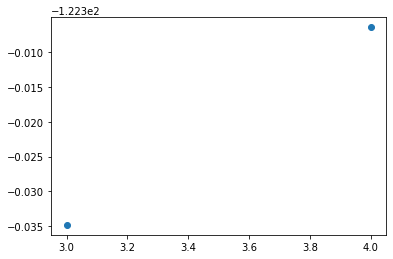

In [30]:
# plt.figure()
# plt.plot(df['X'], df['Y'])
# plt.show()
# print(df['X'][2:4])
plt.plot(df['X'][3:5],'o')
plt.show()